# Práctica 6b: análisis de clustering de partición

##### Cookbook [@data_mining_2020](https://nbviewer.jupyter.org/github/JacoboGGLeon/data_mining_2020/blob/master/README.ipynb)

## Recipe

### Clustering de partición

Método de agrupación utilizado para clasificar de manera no supervisada las observaciones, dentro de un conjunto de datos, en múltiples grupos basados en su similitud. Los algoritmos tienen la particularidad de requerir que se especifique el número de clústers que se van a generar:
*  K-means (MacQueen, 1967), en el cual, cada cluster está representado por el centro o medio de los puntos de datos pertenecientes al clúster. El método K-means es sensible a los puntos de datos anómalos y a los valores atípicos.
* k-medoides o PAM (Partitioning Around Medoids, Kaufman & Rousseeuw, 1990), en el que cada cluster está representado por uno de los objetos reales del clúster. PAM es menos sensible a los valores atípicos en comparación con los k-medios.
*  CLARA (Clustering Large Applications), es una extensión de PAM adaptado para grandes conjuntos de datos.

Se usarán las siguientes librerías para calcular y visualizar el clustering de particiones:
* `stats` para calcular K-means
* `cluster` para ejecutar los algoritmos PAM y CLARA 
* `factoextra` para la visualización de los clusters

In [1]:
packages <- c("stats", "cluster", "factoextra")
lapply(packages, library, character.only = TRUE)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



[[1]]
[1] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[7] "base"     

[[2]]
[1] "cluster"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[3]]
 [1] "factoextra" "ggplot2"    "cluster"    "stats"      "graphics"  
 [6] "grDevices"  "utils"      "datasets"   "methods"    "base"

### Ideas básicas de k-means

La idea básica detrás de k-means consiste en definir los clústers de manera que *la variación total dentro del cluster (conocida como variación total dentro del cluster) sea minimizada*.
Hay varios algoritmos de k-means disponibles. El algoritmo estándar es el algoritmo Hartigan-Wong (1979), que define la variación total dentro del cluster como *la suma de las distancias cuadradas de las distancias euclidianas entre los objetos y el correspondiente centroide*:

$$W(C_k)=\sum_{x_i \in C_k}{(x_i - \mu_k)^2}$$

Donde: 
* $x_i$ es un objeto perteneciente al cluster $C_k$
* $\mu_k$ es el valor medio de los objetos agrupados en el clúster $C_k$

Inicialmente cada observación $x_i$ se asigna a un grupo dado, de tal forma que la suma de los cuadrados (sum of squares, SS) de la distancia de la observación al centro de su clúster asignado μk es un mínimo. Definimos la variación total dentro del clúster de la siguiente manera:

$$\mbox{total within-cluster SS} = \sum_{k=1}^{k}{W(C_k)} = \sum_{k=1}^{k}\sum_{x_i \in C_k}{(x_i-\mu_k)^2}$$

La *suma total de cuadrados dentro del clúster* mide la compacidad de los clúster y queremos que sea lo más pequeño posible.

### k-means

1. Especificar el número $k$ de clústers.
2. Objetos seleccionados al azar del conjunto de datos como los primeros centros de clustersormeans
3. Asigna cada observación a su centroide más cercano, basándose en la distancia euclidiana entre el objeto y el centroide
4. 4. Para cada uno de los k clusters actualizar el centroide del cluster calculando los nuevos valores medios de todos los puntos de datos del cluster. El centroide de un cúmulo Kth es un vector de longitud p que contiene las medias de todas las variables para las observaciones en el cúmulo kth; p es el número de variables.
5. 5. Minimizar iterativamente el total dentro de la suma de los cuadrados. Es decir, iterar los pasos 3 y 4 hasta que las asignaciones del cúmulo dejen de cambiar o se alcance el número máximo de iteraciones. Por defecto, el software R utiliza 10 como valor de propuesta para el número máximo de iteraciones.

In [2]:
df <- read.csv('../../pmsm_temperature_data.csv')
head(df, n = 3)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-0.7521430,-1.118446,0.3279352,-1.297858,-1.222428,-0.2501821,1.029572,-0.2458600,-2.522071,-1.831422,-2.066143,-2.018033,4
2,-0.7712632,-1.117021,0.3296648,-1.297686,-1.222429,-0.2491333,1.029509,-0.2458323,-2.522418,-1.830969,-2.064859,-2.017631,4
3,-0.7828916,-1.116681,0.3327715,-1.301822,-1.222428,-0.2494311,1.029448,-0.2458179,-2.522673,-1.830400,-2.064073,-2.017343,4


In [3]:
kmeans(df, 3, iter.max = 10, nstart = 1)

K-means clustering with 3 clusters of sizes 280653, 314975, 402442

Cluster means:
     ambient    coolant         u_d         u_q motor_speed      torque
1 -0.8893460 -0.8973792 -0.48816931  0.02072532   0.1845910  0.41923036
2  0.4558672  0.3374142  0.04075458  0.29398179   0.1180259  0.01328926
3  0.2537332  0.3734414  0.32039574 -0.25865163  -0.2368155 -0.31102733
          i_d         i_q          pm stator_yoke stator_tooth stator_winding
1 -0.21879289  0.40812173 -0.33236749  -0.7459167  -0.54448695    -0.35689287
2 -0.07223839  0.02443143  0.26632300   0.4081137   0.38269256     0.32769780
3  0.22410552 -0.31165666  0.01244287   0.2022804   0.07471842    -0.01734592
  profile_id
1   20.49643
2   51.55165
3   71.17603

Clustering vector:
    [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [37] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [73] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [10

### Determinando el número óptimo de clústers

¿Cuál es el número óptimo de clústers en un conjunto de datos? Desafortunadamente, no hay una respuesta definitiva a esta pregunta. El número óptimo de clústers es de alguna manera subjetivo y depende del método utilizado para medir las similitudes y los parámetros utilizados para la partición.

Estos métodos incluyen métodos directos y métodos de pruebas estadísticas:
1. Métodos directos: consisten en optimizar algún criterio, como las sumas de cuadrados dentro del clúster, métodos de codo (elbow), o o la silueta media, silueta media (average silhouette).

![](https://www.oreilly.com/library/view/numerical-computing-with/9781789953633/assets/f54e236e-f441-43d6-80a9-07feef4f6ef4.png)

2. Métodos de prueba estadística: consiste en comparar la evidencia con la hipótesis nula. Un ejemplo es *gap statistic*.

![](https://i.stack.imgur.com/jTY0S.png)

Además del codo, la silueta y los métodos estadísticos, hay más de treinta otros índices y métodos que han sido publicados para identificar el número óptimo de clústers usando la "regla de la mayoría".

In [4]:
# Standardize the data
df <- scale(df) 
head(df)

ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
-0.7534159,-1.120453,0.3238419,-1.289164,-1.214600,-0.2473671,1.024560,-0.2431737,-2.528583,-1.830111,-2.064766,-2.017441,-2.117145
-0.7726685,-1.119031,0.3255752,-1.288993,-1.214601,-0.2463161,1.024496,-0.2431459,-2.528931,-1.829658,-2.063482,-2.017039,-2.117145
-0.7843773,-1.118693,0.3286885,-1.293119,-1.214599,-0.2466145,1.024435,-0.2431315,-2.529188,-1.829090,-2.062696,-2.016751,-2.117145
-0.7824075,-1.118775,0.3296189,-1.293149,-1.214601,-0.2458181,1.027836,-0.2442708,-2.528149,-1.829023,-2.061759,-2.017040,-2.117145
-0.7754671,-1.118786,0.3311283,-1.294412,-1.214600,-0.2458827,1.026797,-0.2439250,-2.528411,-1.829188,-2.061417,-2.017554,-2.117145
-0.7642838,-1.118966,0.3308228,-1.294311,-1.214600,-0.2453778,1.026020,-0.2436553,-2.528715,-1.830619,-2.061171,-2.017292,-2.117145


## Se creo una muestra ya que con el dataset completo no se podia graficar

In [16]:
set.seed(123) #proponemos una semilla para que sea reproducible el experimento
ss <- sample(1:500) #tomamos 15 observaciones 
df <- df[ss, ]  #creamos el subcojunto
head(df)

ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
-0.9263128,-1.058936,0.1819217,1.676755,2.027959,-0.2594333,-0.8443308,-0.2534871,-1.900913,-1.452113,-1.338988,-1.216165,-2.117145
-0.8758702,-1.093405,0.1822945,1.674888,2.027959,-0.2636491,-0.8665491,-0.2539255,-2.287901,-1.745099,-1.755330,-1.645354,-2.117145
-0.9075927,-1.058350,0.1793084,1.677214,2.027962,-0.2629147,-0.8348805,-0.2534575,-1.722390,-1.332932,-1.175441,-0.997283,-2.117145
-0.8199496,-1.093275,0.1843976,1.675435,2.027962,-0.2653386,-0.8666361,-0.2540012,-2.277636,-1.745079,-1.747496,-1.625194,-2.117145
-0.9168931,-1.061450,0.1822018,1.676081,2.027959,-0.2607534,-0.8440520,-0.2536347,-1.899540,-1.450624,-1.336420,-1.215207,-2.117145
-0.9546718,-1.089009,0.1856571,1.675675,2.027962,-0.2634883,-0.8612810,-0.2540118,-2.206605,-1.739113,-1.679170,-1.530151,-2.117145


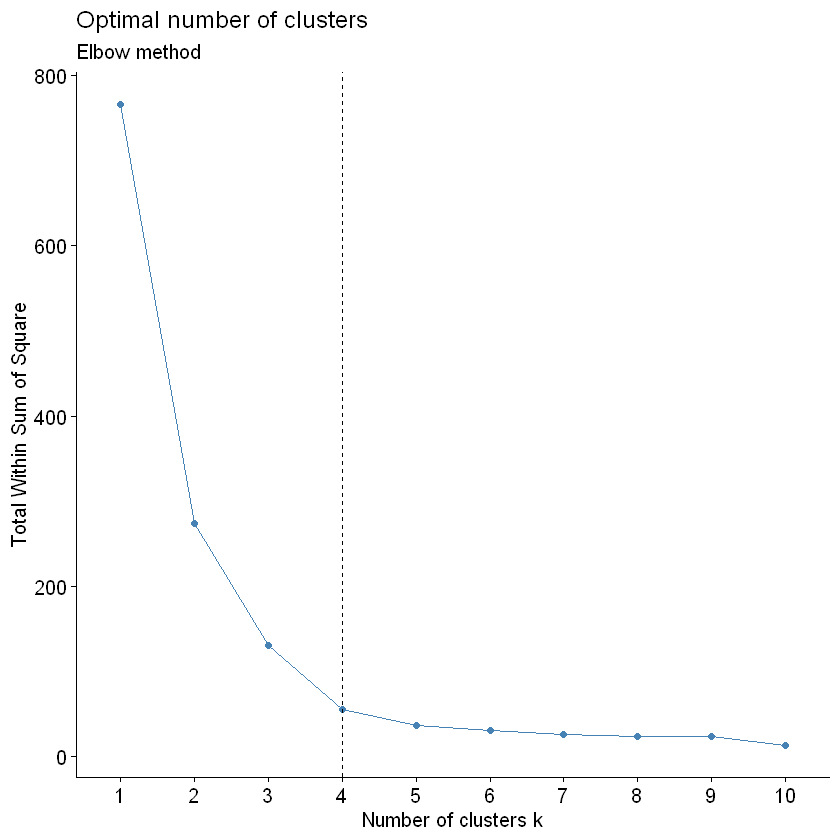

In [17]:
# Elbow method
fviz_nbclust(df, kmeans, method = "wss") + geom_vline(xintercept = 4, linetype = 2) + labs(subtitle = "Elbow method")

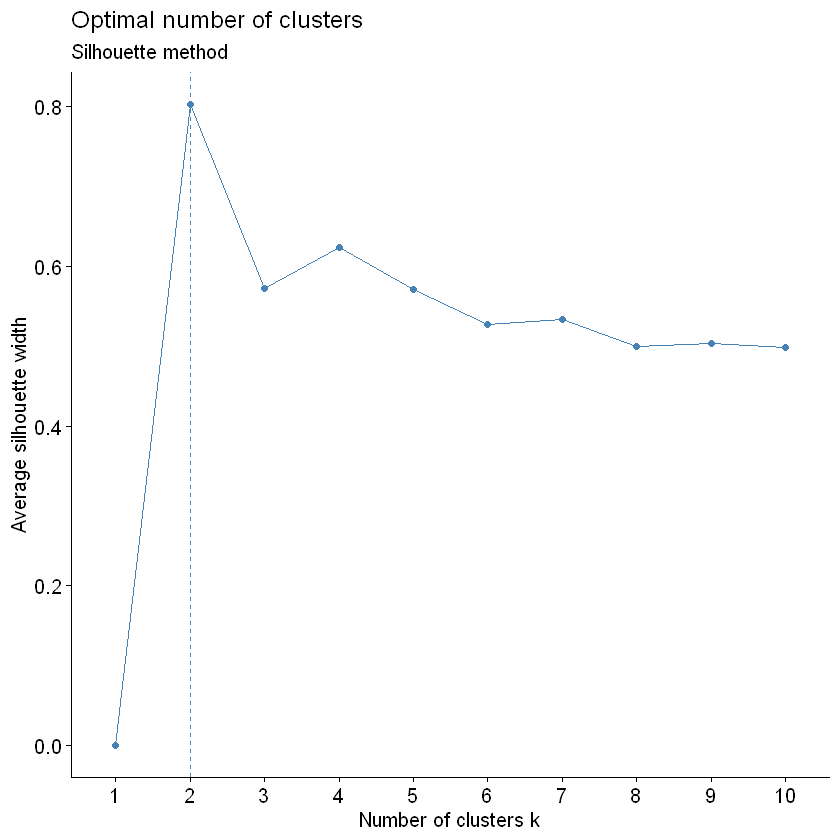

In [18]:
# Silhouette method
fviz_nbclust(df, kmeans, method = "silhouette") + labs(subtitle = "Silhouette method")

### La "regla de la mayoría"

En R existe la librería `NbClust()` donde a través de 30 índices distintos, podemos elegir el número óptimo de clústers dentro de un conjunto de datos si proponemos una votación con estos índices. La función `NbClust()` como tal es una heurística y admite los siguientes parámetros:

`NbClust(data, diss, distance, min.nc, max.nc, method)`

Donde:
* `data`: es una matriz de datos
* `diss`: es una matriz de disimilaridad a utilizar. Por defecto, `diss=NULL`, pero si es
reemplazado por una matriz de disimilaridad, la distancia debe ser `NULL` (nula)
* `distance`: la medida de distancia que se utilizará para calcular la matriz de disimilitudes. Los valores posibles son `euclidean`, `manhattan` o `NULL`.
* `min.nc`, `max.nc`: número mínimo y máximo de clústers, respectivamente
* `method`: El método de análisis de clustering que se utilizará, incluyendo  `ward.D`, `ward.D2`, `single`, `complete`, `average`, `kmeans`, entre otros.

In [20]:
install.packages("NbClust")
library("NbClust")

Installing package into 'C:/Users/Montserrat/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'NbClust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Montserrat\AppData\Local\Temp\RtmpWoFmd5\downloaded_packages


Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning message in log(det(P)/det(W)):
"NaNs produced"
Warning me

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 


Warning message in matrix(c(results), nrow = 2, ncol = 26):
"data length [51] is not a sub-multiple or multiple of the number of rows [2]"
Warning message in matrix(c(results), nrow = 2, ncol = 26, dimnames = list(c("Number_clusters", :
"data length [51] is not a sub-multiple or multiple of the number of rows [2]"


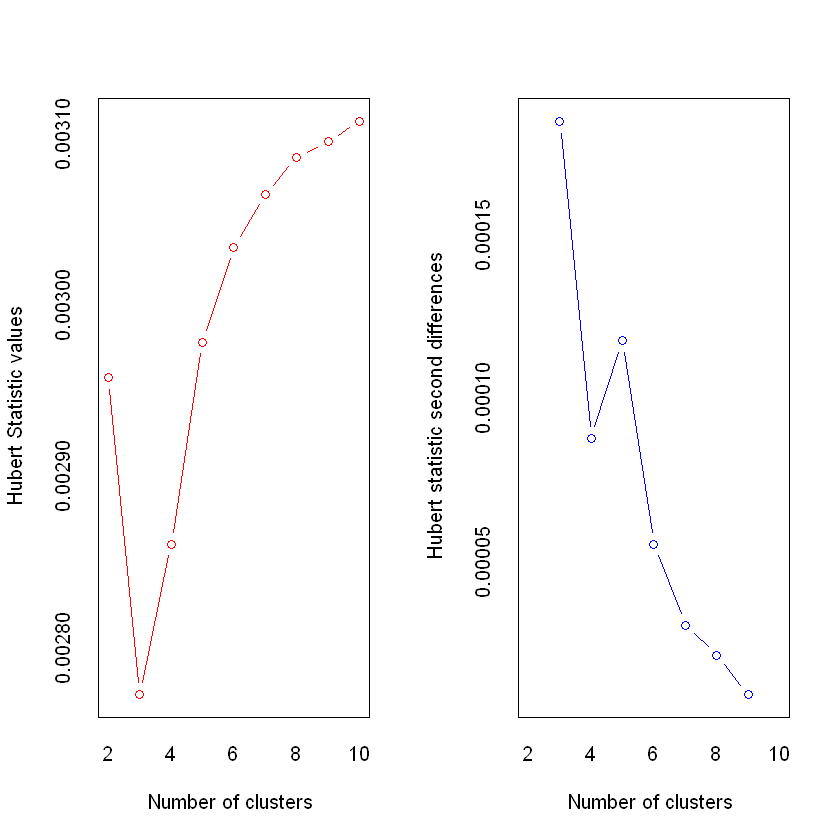

******************************************************************* 
* Among all indices:                                                
* 2 proposed 2 as the best number of clusters 
* 5 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 3 proposed 7 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


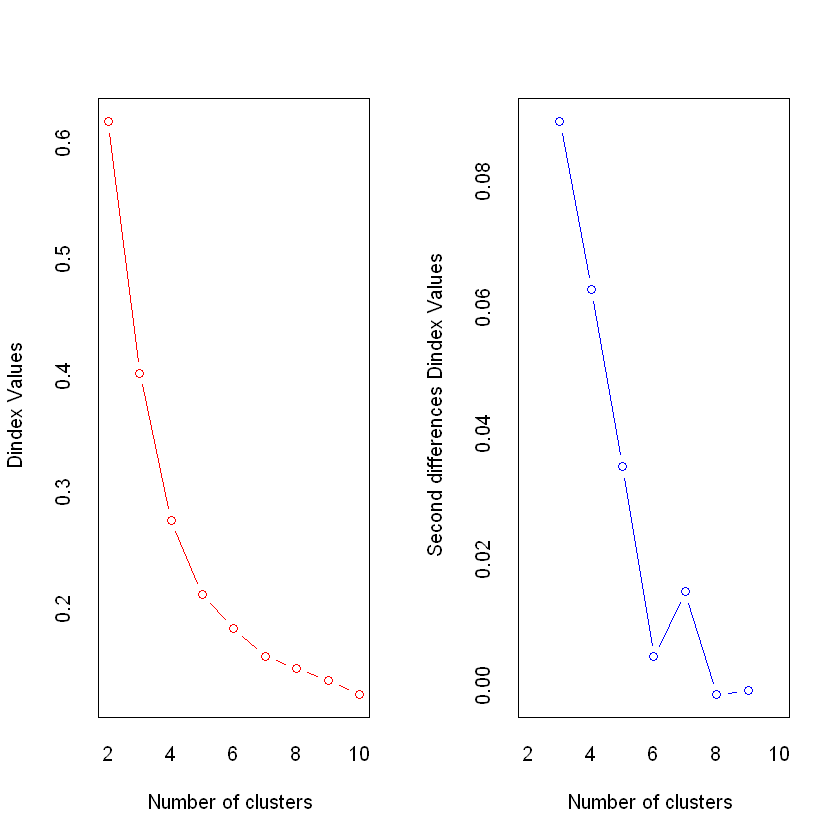

In [22]:
nb <- NbClust(df, distance = "euclidean", min.nc = 2, max.nc = 10, method = "kmeans")

Podemos visualizar el resultado de `NbClust()` usando la función `fviz_nbclust()` de la librería `factoextra`

Among all indices: 
* 1 proposed  -Inf as the best number of clusters
* 2 proposed  0 as the best number of clusters
* 1 proposed  0.022 as the best number of clusters
* 1 proposed  0.0805 as the best number of clusters
* 1 proposed  0.1343 as the best number of clusters
* 1 proposed  0.8703 as the best number of clusters
* 2 proposed  2 as the best number of clusters
* 5 proposed  3 as the best number of clusters
* 1 proposed  4 as the best number of clusters
* 3 proposed  5 as the best number of clusters
* 1 proposed  6 as the best number of clusters
* 1 proposed  6.1349 as the best number of clusters
* 3 proposed  7 as the best number of clusters
* 1 proposed  7.5005 as the best number of clusters
* 1 proposed  10 as the best number of clusters
* 1 proposed  93.3861 as the best number of clusters

Conclusion
* According to the majority rule, the best number of clusters is  3 .



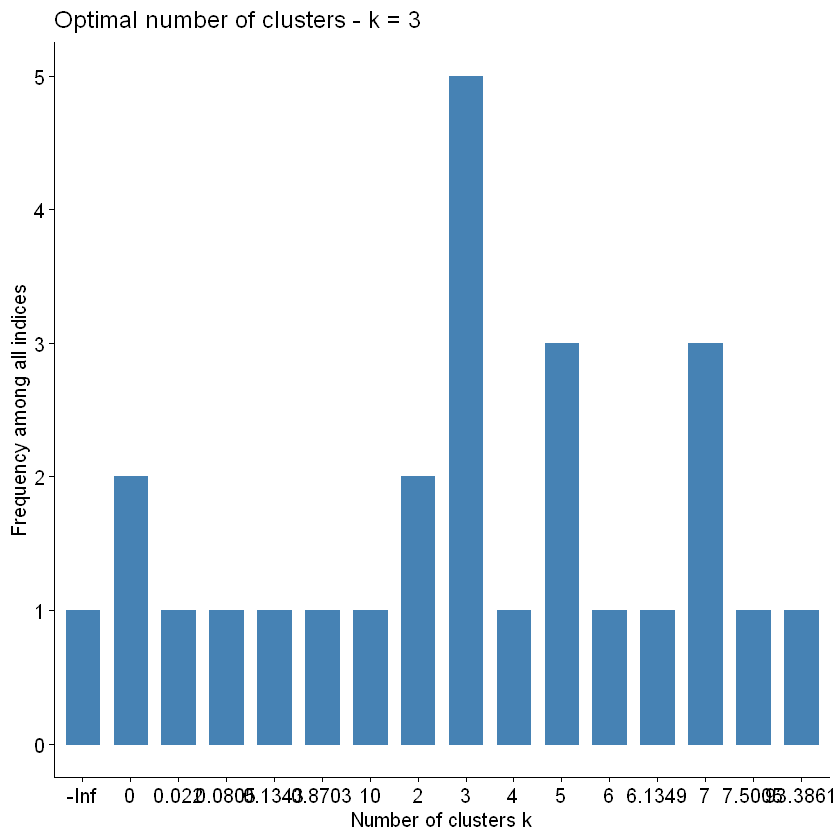

In [23]:
library("factoextra") 
fviz_nbclust(nb)